https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'dogs-vs-cats/train'
validation_data_dir = 'dogs-vs-cats/test'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [2]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 29s 225ms/step - loss: 0.8262 - accuracy: 0.5072 - val_loss: 0.6768 - val_accuracy: 0.5925
Epoch 2/50
125/125 [==============================] - 20s 159ms/step - loss: 0.6839 - accuracy: 0.5648 - val_loss: 0.6503 - val_accuracy: 0.6687
Epoch 3/50
125/125 [==============================] - 20s 160ms/step - loss: 0.6453 - accuracy: 0.6426 - val_loss: 0.5867 - val_accuracy: 0.7150
Epoch 4/50
125/125 [==============================] - 19s 149ms/step - loss: 0.6376 - accuracy: 0.6534 - val_loss: 0.5770 - val_accuracy: 0.7250
Epoch 5/50
125/125 [==============================] - 19s 155ms/step - loss: 0.6243 - accuracy: 0.6581 - val_loss: 0.6179 - val_accuracy: 0.6812
Epoch 6/50
125/125 [==============================] - 18s 145ms/step - loss: 0.5877 - accuracy: 0.6876 - val_loss: 0.6099 - val_accuracy: 0.6825
Epoch 7/50
125/125 [=========================

In [3]:
from keras.models import load_model 
model.load_weights('first_try.h5')

In [7]:
model.save('first_try_model.h5')

In [45]:
test_model = load_model('model1_catsVSdogs_10epoch.h5')

In [ ]:
from keras.preprocessing import image



In [33]:
img1 = image.load_img('dogs-vs-cats/test1/1.jpg',False,target_size=(img_width,img_height))
img2 = image.load_img('dogs-vs-cats/test1/2.jpg',False,target_size=(img_width,img_height))
img3 = image.load_img('dogs-vs-cats/test1/3.jpg',False,target_size=(img_width,img_height))
img4 = image.load_img('dogs-vs-cats/test1/4.jpg',False,target_size=(img_width,img_height))
img5 = image.load_img('dogs-vs-cats/test1/5.jpg',False,target_size=(img_width,img_height))

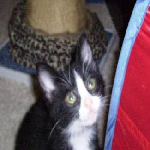

In [30]:
img

In [42]:
x1 = image.img_to_array(img1)
x2 = image.img_to_array(img2)
x3 = image.img_to_array(img3)
x4 = image.img_to_array(img4)
x5 = image.img_to_array(img5)

x = np.expand_dims(x1, axis=0)
preds = test_model.predict_classes(x)[0][0]
prob = float(test_model.predict_proba(x))
print(preds, prob)

1 1.0


In [43]:
test_model.predict(x)

array([[1.]], dtype=float32)

In [6]:
from keras.preprocessing import image

test_image =image.load_img('dogs-vs-cats/test1/1.jpg',target_size =(150,50))
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axis =0)
result = model.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

ValueError: in user code:

    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/jent_so/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 18496 but received input with shape (None, 4352)
